Gunakan dataset retail.csv. Lakukan analisis untuk <b> top brands </b> pada bulan <b> Desember 2019 </b>. Ada beberapa case yang perlu diselesaikan, yaitu sebagai berikut.
* Case 1: Menentukan brand top 5.
* Case 2: Menampilkan multi-line chart daily quantity untuk brand top 5.
* Case 3: Menampilkan kuantitas penjualan brand top 5 selama Desember 2019.
* Case 4: Menampilkan penjualan produk di bawah 100 dan di atas 100 selama Desember 2019.
* Case 5: Menunjukkan bahwa produk brand top 5 murah atau mahal.
* Case 6: Menunjukkan korelasi quantity dan GMV serta korelasi median harga dan quantity.

#### Memanggil library di Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

#### Membaca file CSV sebagai data frame

In [2]:
retail = pd.read_csv('retail.csv')

#### Memahami dataset

In [3]:
retail.shape

(5000, 9)

Dataset terdiri dari 5000 baris dan 9 kolom.

Menampilkan nama kolom dari dataset.

In [4]:
retail.columns.values

array(['order_id', 'order_date', 'customer_id', 'city', 'province',
       'product_id', 'brand', 'quantity', 'item_price'], dtype=object)

Melihat preview data.

In [5]:
retail.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


#### Penambahan kolom order month pata dataset

In [6]:
retail['order_month'] = retail['order_date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m'))
retail.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10


#### Penambahan kolom GMV (Gross Merchandise Volume)

In [7]:
retail['gmv'] = retail['quantity'] * retail['item_price']
retail.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08,820000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000


# 

### Case 1: Menentukan brand top 5
Buat data frame baru yang berisi data penjualan bulan Desember 2019, hanya untuk top 5 brand dengan quantity terjual terbanyak selama bulan Desember 2019.

Menampilkan top 5 brands berdasarkan quantity terjual terbanyak pada bulan Desember.

In [8]:
top_brands = ((retail[retail['order_month'] == '2019-12']).groupby('brand')['quantity']
              .sum().reset_index().sort_values(by = 'quantity', ascending = False).head())
top_brands

,brand,quantity
8,BRAND_S,2197
6,BRAND_P,2194
7,BRAND_R,1508
2,BRAND_C,1365
0,BRAND_A,1315


Menampilkan informasi top 5 brands berdasarkan quantity terjual terbanyak pada bulan Desember.

In [9]:
retail_top_brands = retail[(retail['order_month'] == '2019-12') & (retail['brand'].isin(top_brands['brand'].to_list()))]
retail_top_brands.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
8,1741846,2019-12-30,16873,Jakarta Barat,DKI Jakarta,P3203,BRAND_S,32,450000,2019-12,14400000
14,1734790,2019-12-18,17422,Jakarta Selatan,DKI Jakarta,P0122,BRAND_A,12,695000,2019-12,8340000
19,1731961,2019-12-13,13880,Bogor,Jawa Barat,P2853,BRAND_R,6,740000,2019-12,4440000
35,1741561,2019-12-29,13521,Bandung,Jawa Barat,P3344,BRAND_S,2,520000,2019-12,1040000
38,1735633,2019-12-19,17096,Jakarta Selatan,DKI Jakarta,P3285,BRAND_S,4,1325000,2019-12,5300000


# 

### Case 2: Menampilkan multi-line chart daily quantity untuk brand top 5
Tampilkan visualisasi multi-line chart untuk daily quantity terjualnya brand top 5, breakdown per brand. Akan terlihat satu tanggal di mana ada salah satu brand yang mengalami lonjakan atau quantity lebih tinggi dari tanggal-tanggal lain. Beri anotasi untuk titik lonjakan tersebut.

Menampilkan data quantity terjualnya brand top 5.

In [10]:
retail_top_brands.groupby(['order_date', 'brand'])['quantity'].sum().unstack()

brand,BRAND_A,BRAND_C,BRAND_P,BRAND_R,BRAND_S
order_date,,,,,
2019-12-01,155,39,109,38,231
2019-12-02,12,105,153,45,47
2019-12-03,24,3,7,42,9
2019-12-04,40,38,54,35,28
2019-12-05,64,150,78,87,227
2019-12-06,90,29,62,25,104
2019-12-08,72,18,140,152,63
2019-12-09,26,66,312,26,57
2019-12-10,126,38,9,18,254


Menampilkan multi-line chart daily quantity untuk brand top 5.

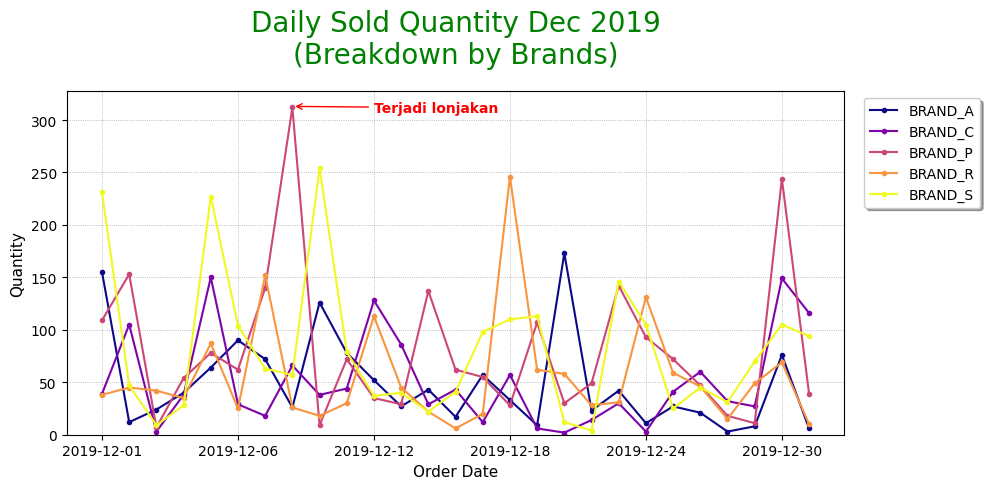

In [11]:
retail_top_brands.groupby(['order_date', 'brand'])['quantity'].sum().unstack().plot(marker = '.', cmap = 'plasma')
plt.title('Daily Sold Quantity Dec 2019\n(Breakdown by Brands)', loc = 'center', pad = 20, fontsize = 20, color = 'green')
plt.xlabel('Order Date', fontsize = 11)
plt.ylabel('Quantity', fontsize = 11)
plt.ylim(ymin = 0)
plt.legend(loc = 'upper center', bbox_to_anchor = (1.1, 1), shadow = True)
plt.annotate('Terjadi lonjakan', xy = (7, 313), xytext = (10, 308),
             weight = 'bold', color = 'red',
             arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc', color = 'red'))
plt.grid(color = 'darkgrey', linestyle = ':', linewidth = 0.6)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

# 

### Case 3: Menampilkan kuantitas penjualan brand top 5 selama Desember 2019
Cari tahu jumlah product untuk masing-masing brand yang laku selama bulan Desember 2019. Gunakan barchart untuk visualisasinya. Urutkan dengan yang kiri adalah brand dengan product lebih banyak.

Menampilkan jumlah product yang laku selama bulan Desember 2019 untuk masing-masing brand.

In [12]:
jumlah_product_per_brands = retail_top_brands.groupby('brand')['product_id'].nunique().sort_values(ascending = False)
jumlah_product_per_brands.reset_index().rename(columns = {'product_id': 'products'})

,brand,products
0,BRAND_S,152
1,BRAND_P,103
2,BRAND_R,87
3,BRAND_C,85
4,BRAND_A,68


Menampilkan barchart kuantitas penjualan brand top 5 selama Desember 2019.

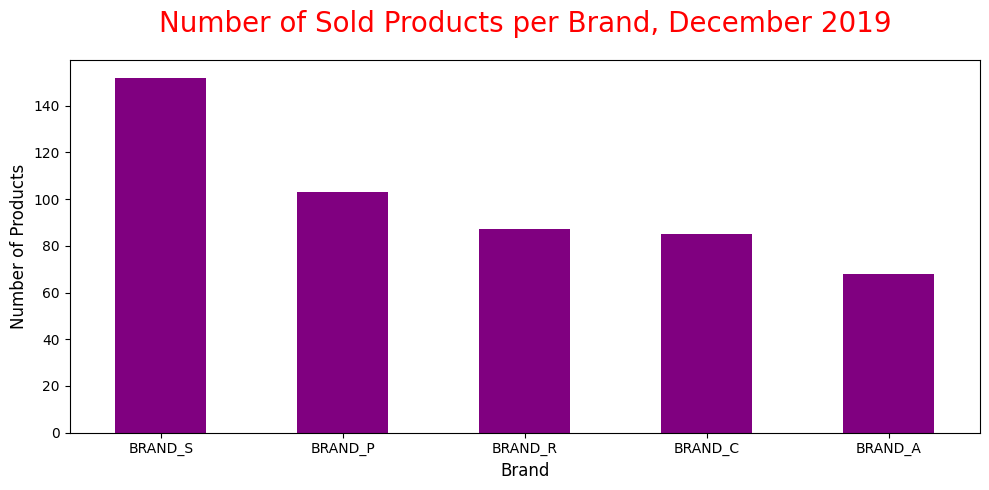

In [13]:
jumlah_product_per_brands.plot(kind = 'bar', color = 'purple')
plt.title('Number of Sold Products per Brand, December 2019', loc = 'center', pad = 20, fontsize = 20, color = 'red')
plt.xlabel('Brand', fontsize = 12)
plt.ylabel('Number of Products', fontsize = 12)
plt.xticks(rotation = 0)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

# 

### Case 4: Menampilkan penjualan produk di bawah 100 dan di atas 100 selama Desember 2019
Gunakan stacked chart, untuk breakdown barchart pada case 3, antara product yang terjual < 100 dan >= 100 pada bulan Desember 2019.

Membuat data frame baru untuk agregat jumlah quantity terjual per product.

In [14]:
product_per_top_brands = retail_top_brands.groupby(['brand', 'product_id'])['quantity'].sum().reset_index()
product_per_top_brands.head()

,brand,product_id,quantity
0,BRAND_A,P0002,1
1,BRAND_A,P0003,32
2,BRAND_A,P0029,12
3,BRAND_A,P0030,30
4,BRAND_A,P0033,1


Membuat kolom baru berupa quantity group.

In [15]:
product_per_top_brands['quantity_group'] = (product_per_top_brands['quantity']
                                            .apply(lambda x: '>= 100' if x >= 100 else '< 100'))
product_per_top_brands.head()

,brand,product_id,quantity,quantity_group
0,BRAND_A,P0002,1,< 100
1,BRAND_A,P0003,32,< 100
2,BRAND_A,P0029,12,< 100
3,BRAND_A,P0030,30,< 100
4,BRAND_A,P0033,1,< 100


Menampilkan data frame berdasarkan urutan dari quantity.

In [16]:
product_per_top_brands.sort_values(by = 'quantity', ascending = False).head()

,brand,product_id,quantity,quantity_group
58,BRAND_A,P0255,258,>= 100
465,BRAND_S,P3534,234,>= 100
238,BRAND_P,P2770,216,>= 100
245,BRAND_P,P2790,185,>= 100
186,BRAND_P,P2489,170,>= 100


Membuat referensi pengurutan brand berdasarkan banyak product.

In [17]:
sort_brands = product_per_top_brands.groupby('brand')['product_id'].nunique().sort_values(ascending = False)
sort_brands

brand
BRAND_S    152
BRAND_P    103
BRAND_R     87
BRAND_C     85
BRAND_A     68
Name: product_id, dtype: int64

Menampilkan jumlah product yang laku selama bulan Desember 2019 untuk masing-masing brand dan quantity group.

In [18]:
jumlah_product_per_brands_and_quantity_group = (product_per_top_brands
                                                .groupby(['brand', 'quantity_group'])['product_id'].nunique()
                                                .reindex(index = sort_brands.index, level = 'brand').unstack())
jumlah_product_per_brands_and_quantity_group

quantity_group,< 100,>= 100
brand,,
BRAND_S,149.0,3.0
BRAND_P,97.0,6.0
BRAND_R,83.0,4.0
BRAND_C,85.0,NaN
BRAND_A,66.0,2.0


Menampilkan stackhed barchart penjualan produk di bawah 100 dan di atas 100 selama Desember 2019.

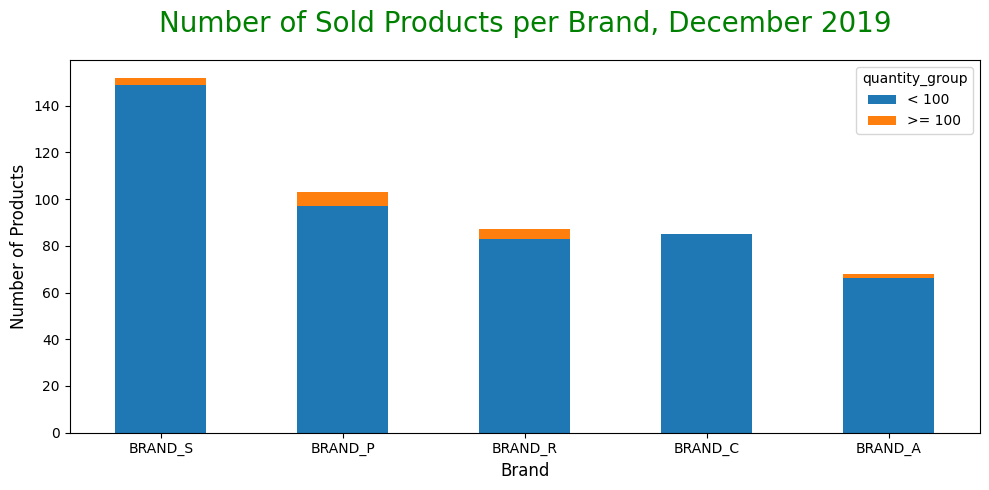

In [19]:
jumlah_product_per_brands_and_quantity_group.plot(kind = 'bar', stacked = True)
plt.title('Number of Sold Products per Brand, December 2019', loc = 'center', pad = 20, fontsize = 20, color = 'green')
plt.xlabel('Brand', fontsize = 12)
plt.ylabel('Number of Products', fontsize = 12)
plt.xticks(rotation = 0)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

# 

### Case 5: Menunjukkan bahwa produk brand top 5 murah atau mahal.
Tampilkan histogram untuk melihat distribusi harga product yang ada di top 5 brand tersebut (untuk setiap product_id, ambil median harganya).

In [20]:
retail_top_brands.groupby('product_id')['item_price'].median().head()

product_id
P0002     904000.0
P0003     450000.0
P0011    5945000.0
P0029     310000.0
P0030     240000.0
Name: item_price, dtype: float64

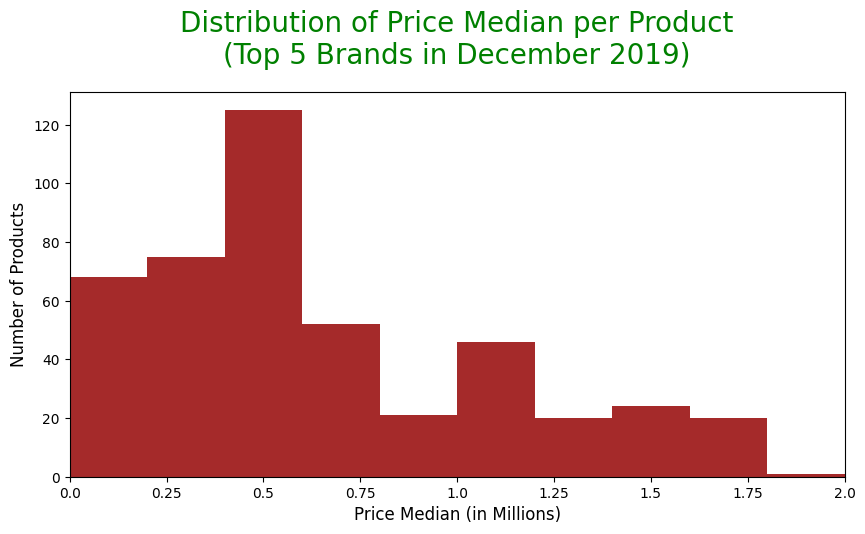

In [21]:
plt.figure(figsize = (10, 5))
plt.hist(retail_top_brands.groupby('product_id')['item_price'].median(), bins = 10, range = (1, 2000000), color = 'brown')
plt.title('Distribution of Price Median per Product\n(Top 5 Brands in December 2019)',
          loc = 'center', pad = 20, fontsize = 20, color = 'green')
plt.xlabel('Price Median (in Millions)', fontsize = 12)
plt.ylabel('Number of Products', fontsize = 12)
plt.xlim(xmin = 0, xmax = 2000000)
labels, locations = plt.xticks()
plt.xticks(labels, labels/1000000)
plt.show()

Dari histogram tersebut dapat dilihat bahwa persebaran harga product-nya cenderung banyak yang murah.

# 

### Case 6: Menunjukkan korelasi quantity dan GMV serta korelasi median harga dan quantity
Untuk setiap product_id, tampilkan scatterplot antara quantity dan GMV serta scatterplot antara median harga dan quantity.

Agregat per product.

In [22]:
data_product_top_brands = (retail_top_brands.groupby('product_id')
                           .agg({'quantity': 'sum', 'gmv': 'sum', 'item_price': 'median'}).reset_index())
data_product_top_brands.head()

,product_id,quantity,gmv,item_price
0,P0002,1,904000,904000.0
1,P0003,32,14400000,450000.0
2,P0011,2,11890000,5945000.0
3,P0029,12,3720000,310000.0
4,P0030,30,7200000,240000.0


Menampilkan scatter plot antara quantity dan GMV.

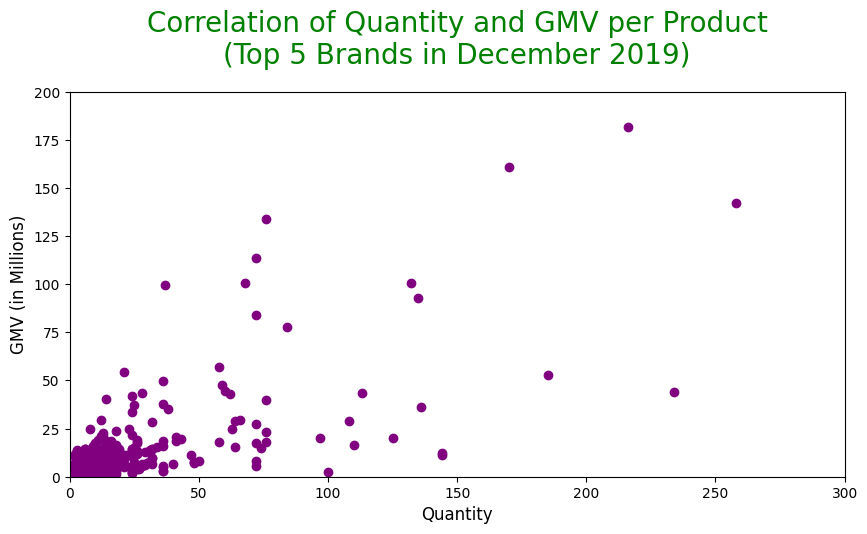

In [23]:
plt.figure(figsize = (10, 5))
plt.scatter(data_product_top_brands['quantity'], data_product_top_brands['gmv'], marker = 'o', color = 'purple')
plt.title('Correlation of Quantity and GMV per Product\n(Top 5 Brands in December 2019)',
          loc = 'center', pad = 20, fontsize = 20, color = 'green')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)', fontsize = 12)
plt.xlim(xmin = 0, xmax = 300)
plt.ylim(ymin = 0, ymax = 200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

Menampilkan scatter plot antara median harga dan quantity.

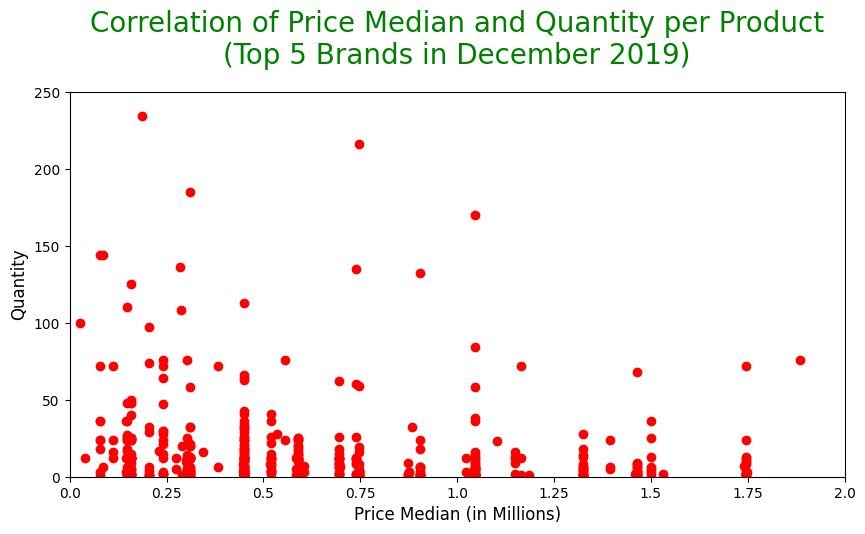

In [24]:
plt.figure(figsize = (10, 5))
plt.scatter(data_product_top_brands['item_price'], data_product_top_brands['quantity'], marker = 'o', color = 'red')
plt.title('Correlation of Price Median and Quantity per Product\n(Top 5 Brands in December 2019)',
          loc = 'center', pad = 20, fontsize = 20, color = 'green')
plt.xlabel('Price Median (in Millions)', fontsize = 12)
plt.ylabel('Quantity', fontsize = 12)
plt.xlim(xmin = 0, xmax = 2000000)
plt.ylim(ymin = 0, ymax = 250)
labels, locations = plt.xticks()
plt.xticks(labels, labels/1000000)
plt.show()